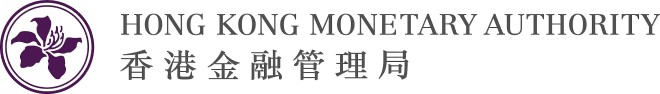

# 透過金管局API收取可靠數據

## [Daily Monetary Statistics 每日金融數據](https://www.hkma.gov.hk/chi/data-publications-and-research/data-and-statistics/daily-monetary-statistics/)
## [API Detailed Documentation 應用程式介面詳細規格](https://apidocs.hkma.gov.hk/chi/documentation/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity/)
## [API Documentation 使用說明](https://apidocs.hkma.gov.hk/documentation/)
## [JSON Output sample JSON格式示範](https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-monetary-base?pagesize=500&choose=end_of_date&from=2022-10&to=2024-07&sortorder=desc)

In [4]:
# pip install yfinance

In [5]:
import numpy as np
import pandas as pd
import requests
import yfinance as yf

import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
apiFrom = '2022-01-01'
apiTo = '2024-07-28'

try:
    response = requests.get(f"https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity?pagesize=1000&choose=end_of_date&from={apiFrom}&to={apiTo}&sortorder=desc")
    if response.status_code==200 : print('Connect successfully!')
    data = response.json()
except Exception as e:
    print(e)

Connect successfully!


In [7]:
df_mbase = pd.DataFrame(data['result']['records'])
df_mbase = df_mbase.set_index('end_of_date')  
df_mbase.index = pd.to_datetime(df_mbase.index)
df_mbase = df_mbase.sort_values('end_of_date')
df_mbase

,cu_weakside,cu_strongside,disc_win_base_rate,hibor_overnight,hibor_fixing_1m,twi,opening_balance,closing_balance,market_activities,interest_payment,...,forex_trans_t4,other_market_activities_t4,reversal_of_discount_window_t4,interest_payment_issuance_efbn_t4,forecast_aggregate_bal_t4,forex_trans_u,other_market_activities_u,reversal_of_discount_window_u,interest_payment_issuance_efbn_u,forecast_aggregate_bal_u
end_of_date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,7.85,7.75,0.50,0.03,0.14929,95.1,377516,377516,0,0,...,None,None,None,None,NaN,0,0,0,-35035,337480
2022-01-04,7.85,7.75,0.50,0.02,0.14298,95.5,377516,377516,0,0,...,None,None,None,None,NaN,0,0,0,-35030,337480
2022-01-05,7.85,7.75,0.50,0.02,0.13655,95.4,377516,372511,0,-5005,...,None,None,None,None,NaN,0,0,0,-35030,337480
2022-01-06,7.85,7.75,0.50,0.01,0.13512,95.5,372511,372511,0,0,...,None,None,None,None,NaN,0,0,0,-35030,337480
2022-01-07,7.85,7.75,0.50,0.01,0.12976,95.4,372511,372511,0,0,...,None,None,None,None,NaN,0,0,0,-30029,337479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-22,7.85,7.75,5.75,4.40,4.63345,106.4,44987,46789,+0,+0,...,None,None,None,None,NaN,+0,+0,-0,-914,43858
2024-07-23,7.85,7.75,5.75,4.43,4.63899,106.4,46789,45007,+0,+0,...,None,None,None,None,NaN,+0,+0,-0,-925,43858
2024-07-24,7.85,7.75,5.75,4.43,4.61821,106.4,45007,44783,+0,-205,...,None,None,None,None,NaN,+0,+0,-0,-925,43858


In [8]:
df_mbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 632 entries, 2022-01-03 to 2024-07-26
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   cu_weakside                                      632 non-null    float64
 1   cu_strongside                                    632 non-null    float64
 2   disc_win_base_rate                               632 non-null    float64
 3   hibor_overnight                                  632 non-null    float64
 4   hibor_fixing_1m                                  632 non-null    float64
 5   twi                                              632 non-null    float64
 6   opening_balance                                  632 non-null    int64  
 7   closing_balance                                  632 non-null    int64  
 8   market_activities                                632 non-null    object 
 9   interest_paym

# 下載相同時段time frame的恒指數據

In [9]:
df_HSI = yf.download('^HSI', start=apiFrom, end=apiTo, progress=False)
df_HSI.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,23510.539062,23605.029297,23193.189453,23274.750000,23274.750000,734331100
2022-01-04,23400.619141,23439.300781,23146.890625,23289.839844,23289.839844,1760141200
2022-01-05,23323.769531,23323.769531,22851.500000,22907.250000,22907.250000,2768859000


# 合併相應的時段的基本利率Base Rate往 DataFrame

In [10]:
df_HSI['HKBaseRate'] = df_mbase['disc_win_base_rate']
df_HSI.head(3)

,Open,High,Low,Close,Adj Close,Volume,HKBaseRate
Date,,,,,,,
2022-01-03,23510.539062,23605.029297,23193.189453,23274.750000,23274.750000,734331100,0.5
2022-01-04,23400.619141,23439.300781,23146.890625,23289.839844,23289.839844,1760141200,0.5
2022-01-05,23323.769531,23323.769531,22851.500000,22907.250000,22907.250000,2768859000,0.5


# 比較Discount Window (貼現窗) Base Rate (基本利率) 與 恒指的收市價

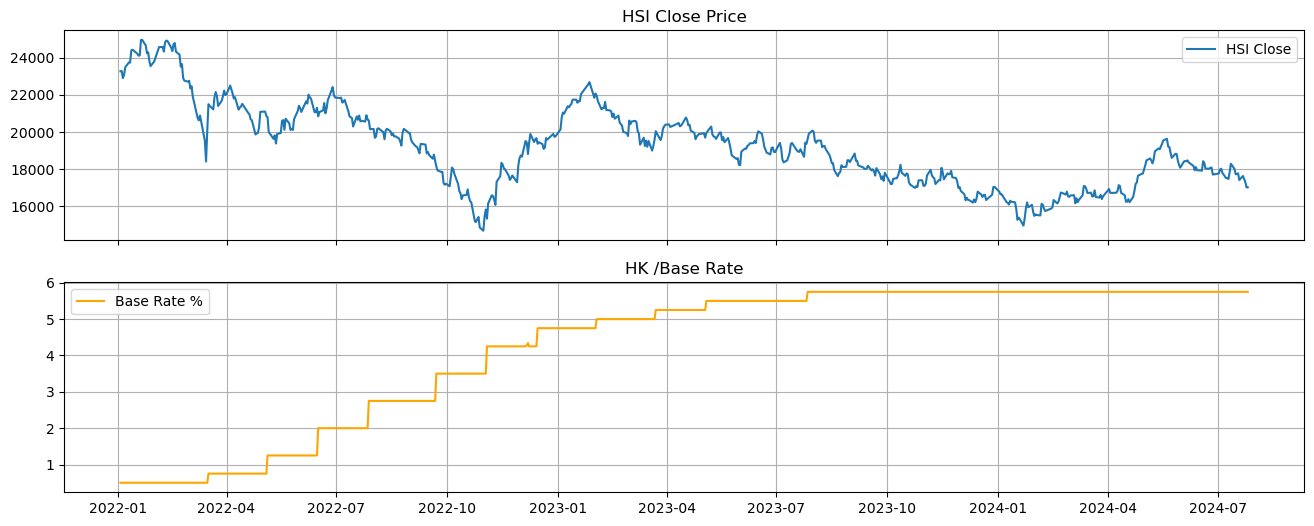

In [11]:
fig, (ax0, ax1 ) = plt.subplots(2, 1, sharex=True, figsize=(16, 6))

ax0.plot(df_HSI.index.unique(), df_HSI['Close'])
ax1.plot(df_HSI.index.unique(), df_HSI['HKBaseRate'],color='orange' )
ax0.set_title("HSI Close Price")
ax1.set_title("HK /Base Rate")
ax0.grid(True)
ax1.grid(True)
ax0.legend(['HSI Close'])
ax1.legend(['Base Rate %'])
plt.show()

# 查看Correlation 的關係

In [12]:
df_HSI['Close'].corr(df_HSI['HKBaseRate'])

-0.6997772484369513

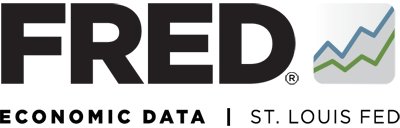

The FRED® API is a web service that allows developers to write programs and build applications that retrieve economic data from the FRED® and ALFRED® websites hosted by the Economic Research Division of the Federal Reserve Bank of St. Louis. Requests can be customized according to data source, release, category, series, and other preferences. <BR>
[https://fred.stlouisfed.org/docs/api/fred/](https://fred.stlouisfed.org/docs/api/fred/)

In [15]:
#pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [18]:
import os
from fredapi import Fred  # fred.search('Treasury')

# Place your FRED API Key to replace os.environ['FRED_API_KEY']
# FRED_API_KEY = os.environ['FRED_API_KEY'] # Create free account https://fred.stlouisfed.org/
fred = Fred(api_key='d726f72ec566c349757f988776269c78') 

In [19]:
apiFrom = '2022-01-01'
apiTo = '2024-07-28'

# 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity (T10Y2Y)
T10Y2Y = fred.get_series('T10Y2Y',observation_start = apiFrom, observation_end = apiTo)

# Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity
T2Y = fred.get_series('DGS2',observation_start = apiFrom, observation_end = apiTo)

# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity
T10Y = fred.get_series('DGS10',observation_start = apiFrom, observation_end = apiTo)

In [20]:
df_HSI['T10Y2Y'], df_HSI['T2Y'], df_HSI['T10Y'] = T10Y2Y, T2Y, T10Y

In [21]:
df_HSI.head(3)

,Open,High,Low,Close,Adj Close,Volume,HKBaseRate,T10Y2Y,T2Y,T10Y
Date,,,,,,,,,,
2022-01-03,23510.539062,23605.029297,23193.189453,23274.750000,23274.750000,734331100,0.5,0.85,0.78,1.63
2022-01-04,23400.619141,23439.300781,23146.890625,23289.839844,23289.839844,1760141200,0.5,0.89,0.77,1.66
2022-01-05,23323.769531,23323.769531,22851.500000,22907.250000,22907.250000,2768859000,0.5,0.88,0.83,1.71


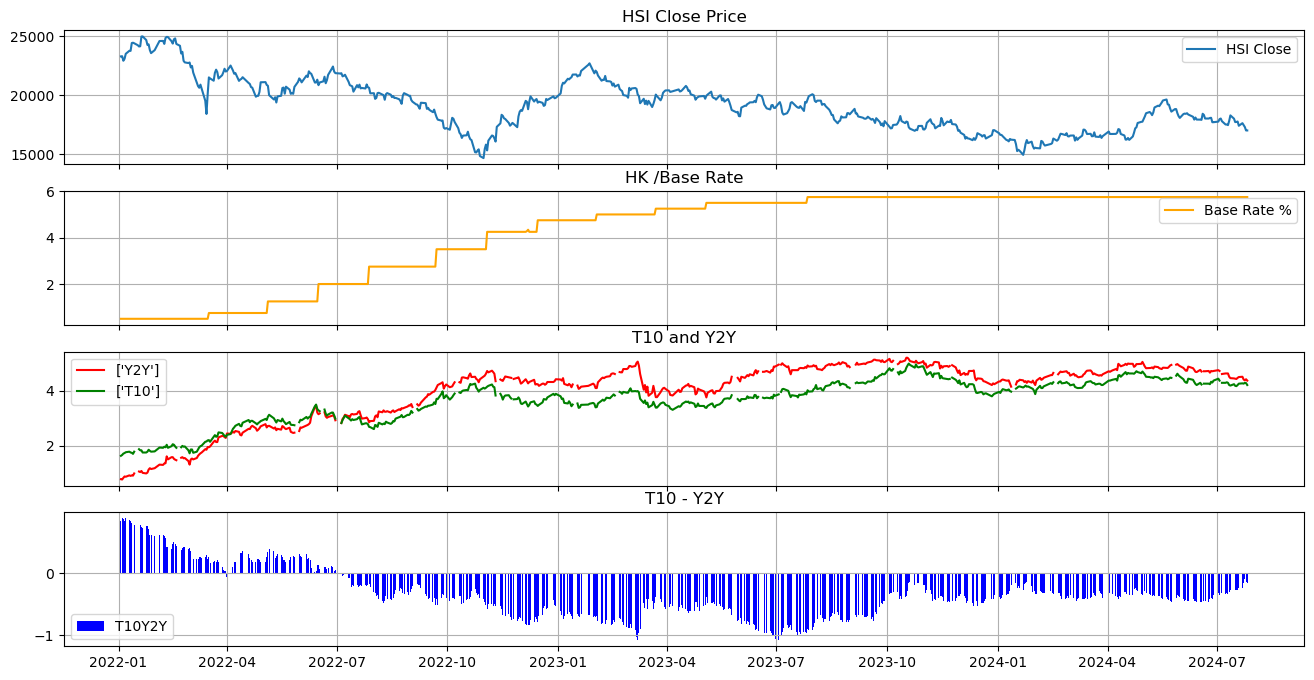

In [22]:
fig, (ax0, ax1, ax2, ax3 ) = plt.subplots(4, 1, sharex=True, figsize=(16, 8))

ax0.plot(df_HSI.index.unique(), df_HSI['Close'])
ax1.plot(df_HSI.index.unique(), df_HSI['HKBaseRate'], color='orange' )
ax2.plot(df_HSI.index.unique(), df_HSI['T2Y'], color='red' )
ax2.plot(df_HSI.index.unique(), df_HSI['T10Y'], color='green' )
ax3.bar(df_HSI.index.unique(), df_HSI['T10Y2Y'], color='blue' )

ax0.set_title("HSI Close Price")
ax1.set_title("HK /Base Rate")
ax2.set_title("T10 and Y2Y")
ax3.set_title("T10 - Y2Y")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax0.legend(['HSI Close'])
ax1.legend(['Base Rate %'])
ax2.legend([['Y2Y'],['T10']])
ax3.legend(['T10Y2Y'])
plt.show()

# 查看Correlation 的關係

In [23]:
df_HSI['Close'].corr(df_HSI['T10Y2Y'])

0.46242899714120517

#  Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
https://fred.stlouisfed.org/series/CPIAUCSL

In [28]:
# Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
cpi_df = fred.get_series('CPIAUCSL',observation_start = apiFrom, observation_end = apiTo)

<Axes: >

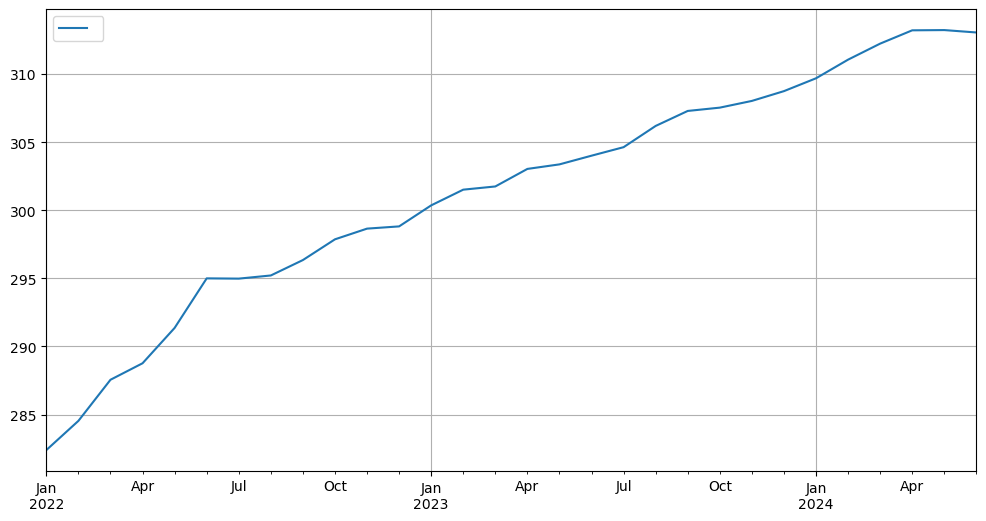

In [36]:
cpi_df.plot(grid=True, legend=True, figsize=(12, 6))

In [31]:
cpi_df.pct_change(1)

2022-01-01         NaN
2022-02-01    0.007596
2022-03-01    0.010607
2022-04-01    0.004211
2022-05-01    0.008987
2022-06-01    0.012483
2022-07-01   -0.000064
2022-08-01    0.000787
2022-09-01    0.003835
2022-10-01    0.005136
2022-11-01    0.002635
2022-12-01    0.000549
2023-01-01    0.005167
2023-02-01    0.003839
2023-03-01    0.000779
2023-04-01    0.004269
2023-05-01    0.001099
2023-06-01    0.002103
2023-07-01    0.002056
2023-08-01    0.005118
2023-09-01    0.003596
2023-10-01    0.000791
2023-11-01    0.001603
2023-12-01    0.002331
2024-01-01    0.003054
2024-02-01    0.004421
2024-03-01    0.003781
2024-04-01    0.003129
2024-05-01    0.000057
2024-06-01   -0.000562
dtype: float64

In [24]:
df_HSI['LogRtn'] = np.log(df_HSI['Close']/df_HSI['Close'].shift(1))

<Axes: ylabel='Frequency'>

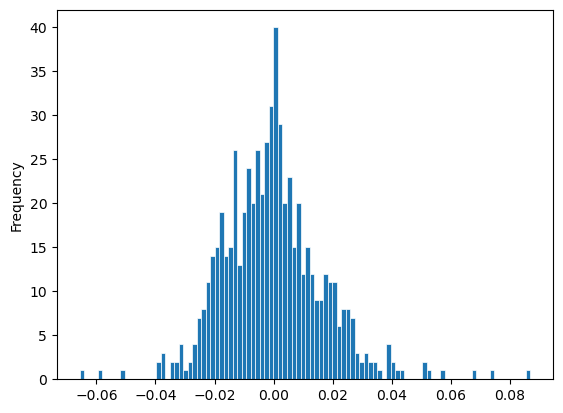

In [25]:
df_HSI['LogRtn'].plot.hist(bins=100, linewidth=0.5, edgecolor="white")